# Wine Quality prediction using SVC, XGBClassifier and Logistic regression

In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequality/winequality-white.csv
/kaggle/input/winequality/winequality-red.csv
/kaggle/input/winequality/msyh.ttf


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


# I will work only on red wine dataset because the values of red and white wine are same

In [87]:
df = pd.read_csv('/kaggle/input/winequality/winequality-red.csv', sep=';', quotechar='"')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [90]:
df.isnull().sum() # There are no null values inside this dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Let's plot the values of every column and see the range of values and number of features for every column

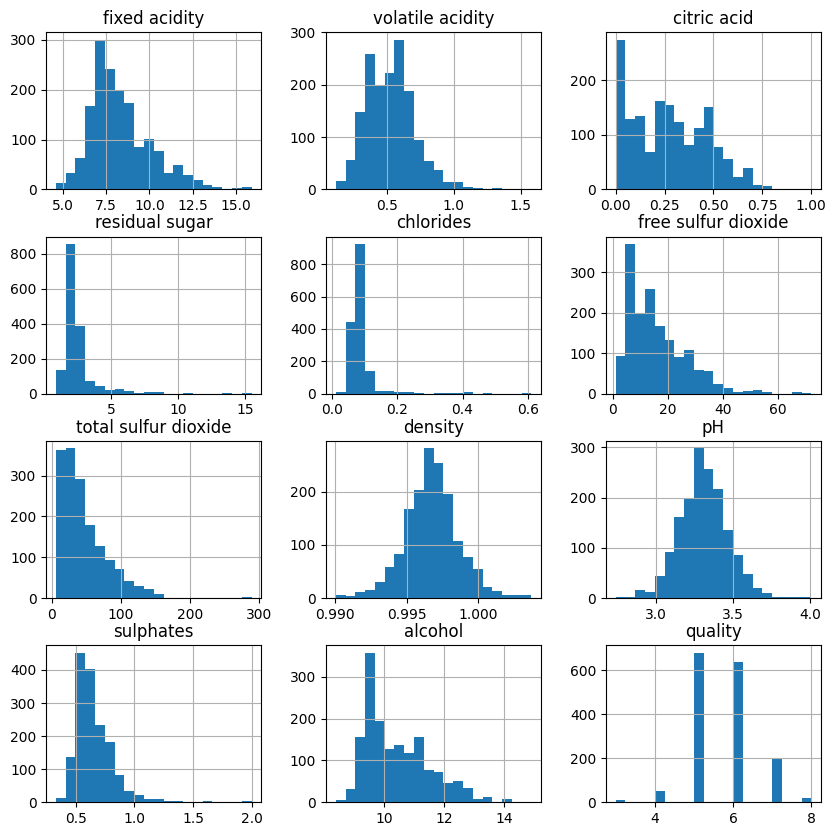

In [91]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

# To see which value effects more on quality

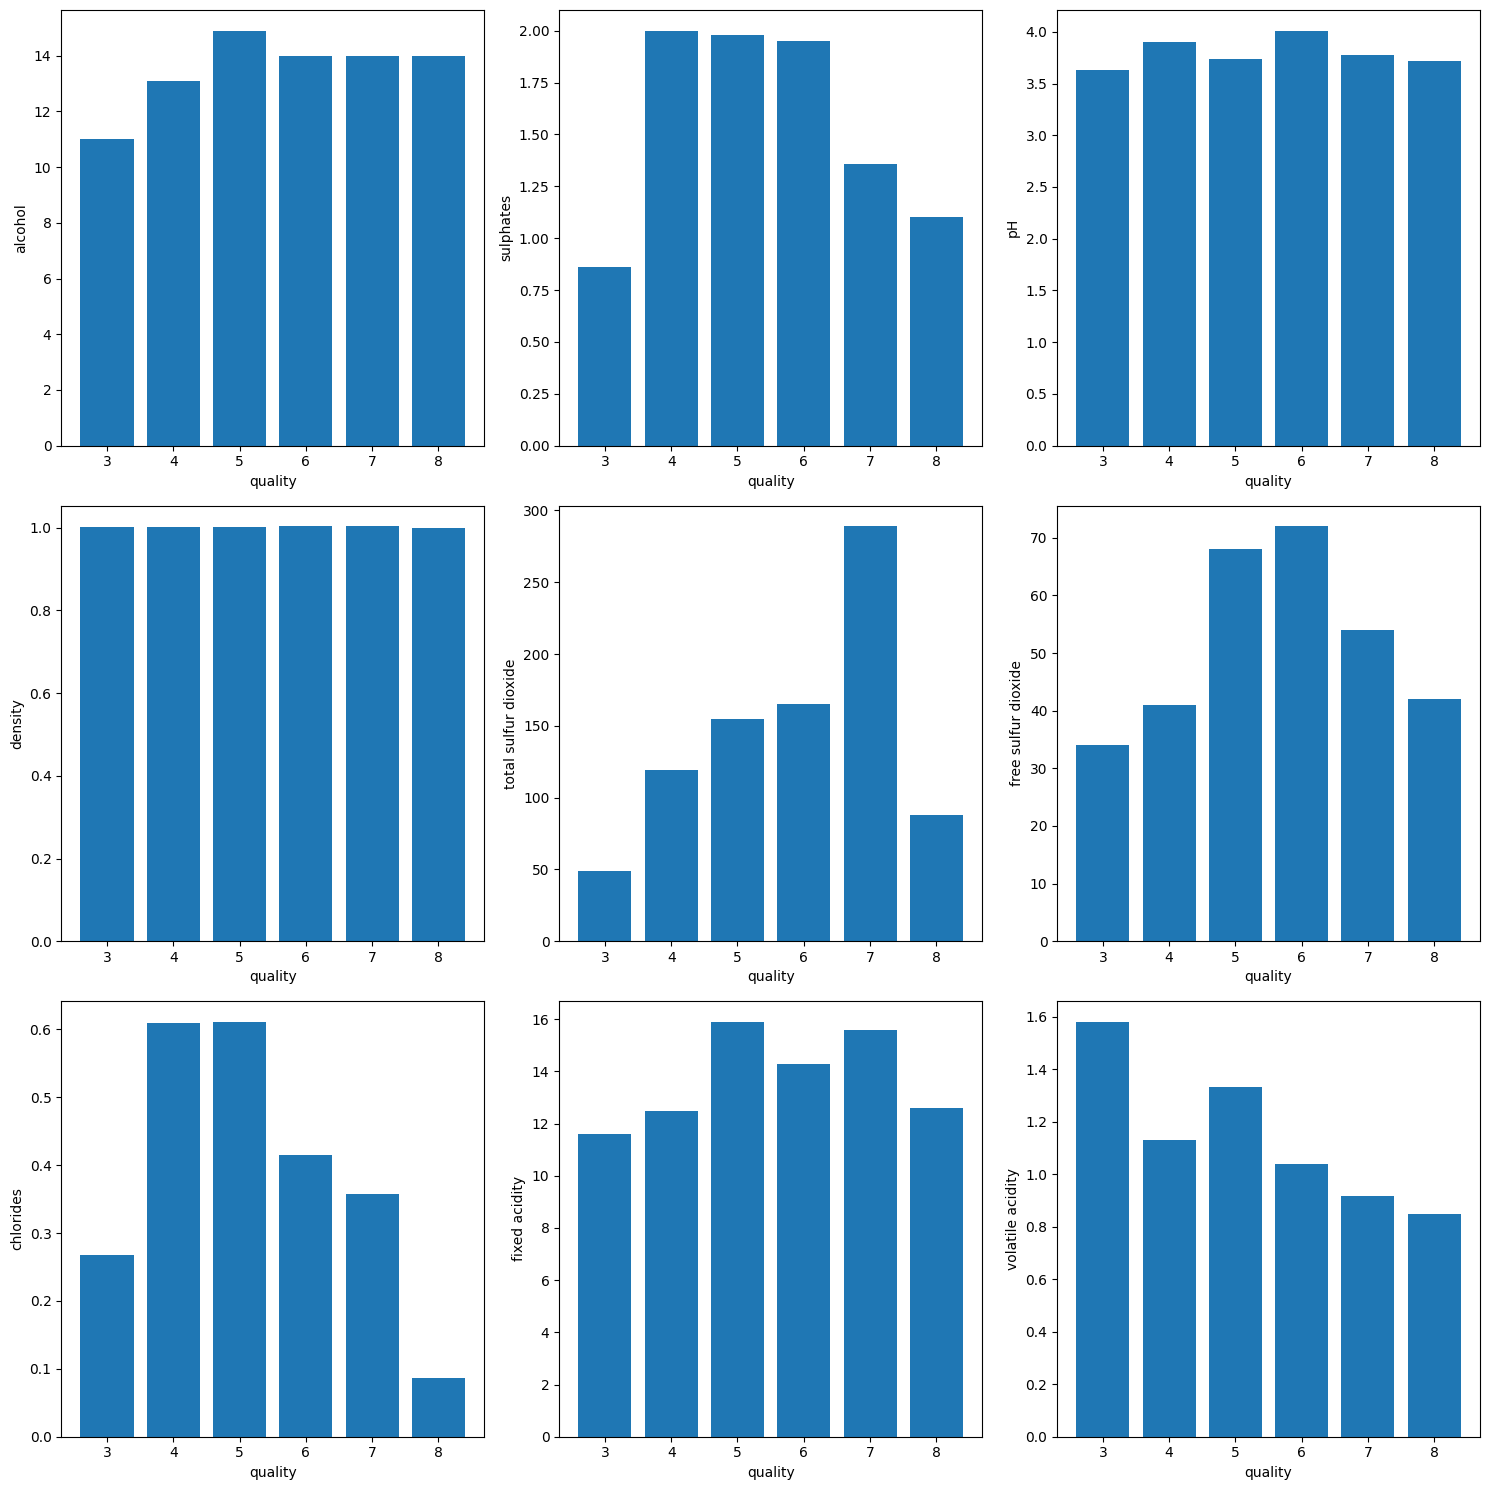

In [92]:
import matplotlib.pyplot as plt

# Create subplots with specified dimensions (3 rows, 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot 1: Alcohol
axs[0, 0].bar(df['quality'], df['alcohol'])
axs[0, 0].set_xlabel('quality')
axs[0, 0].set_ylabel('alcohol')

# Plot 2: Sulphates
axs[0, 1].bar(df['quality'], df['sulphates'])
axs[0, 1].set_xlabel('quality')
axs[0, 1].set_ylabel('sulphates')

# Plot 3: pH
axs[0, 2].bar(df['quality'], df['pH'])
axs[0, 2].set_xlabel('quality')
axs[0, 2].set_ylabel('pH')

# Plot 4: Density
axs[1, 0].bar(df['quality'], df['density'])
axs[1, 0].set_xlabel('quality')
axs[1, 0].set_ylabel('density')

# Plot 5: Total Sulfur Dioxide
axs[1, 1].bar(df['quality'], df['total sulfur dioxide'])
axs[1, 1].set_xlabel('quality')
axs[1, 1].set_ylabel('total sulfur dioxide')

# Plot 6: Free Sulfur Dioxide
axs[1, 2].bar(df['quality'], df['free sulfur dioxide'])
axs[1, 2].set_xlabel('quality')
axs[1, 2].set_ylabel('free sulfur dioxide')

# Plot 7: Chlorides
axs[2, 0].bar(df['quality'], df['chlorides'])
axs[2, 0].set_xlabel('quality')
axs[2, 0].set_ylabel('chlorides')

# Plot 8: Fixed Acidity
axs[2, 1].bar(df['quality'], df['fixed acidity'])
axs[2, 1].set_xlabel('quality')
axs[2, 1].set_ylabel('fixed acidity')

# Plot 9: Volatile Acidity
axs[2, 2].bar(df['quality'], df['volatile acidity'])
axs[2, 2].set_xlabel('quality')
axs[2, 2].set_ylabel('volatile acidity')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


# quality, chlorides
not contain much importance
# quality, free sulfur dioxide
not contain much importance
# quality,total sulfur dioxide
not contain much importance
# quality, density
Already maximum density is must in achieving whatever quality
# quality, pH
Not contain much information
# quality, sulphates
By increasing the sulphates it increase the quality a little bit. but the peek quality
we can receive by increasing the sulphate is 7
# quality, alcohol
It shows that the quantity of alcohol does not matter in quality of wine

# Combining alcohol and sulphates to understand their combined effects on quality.

* same can be done to other parameters as well.

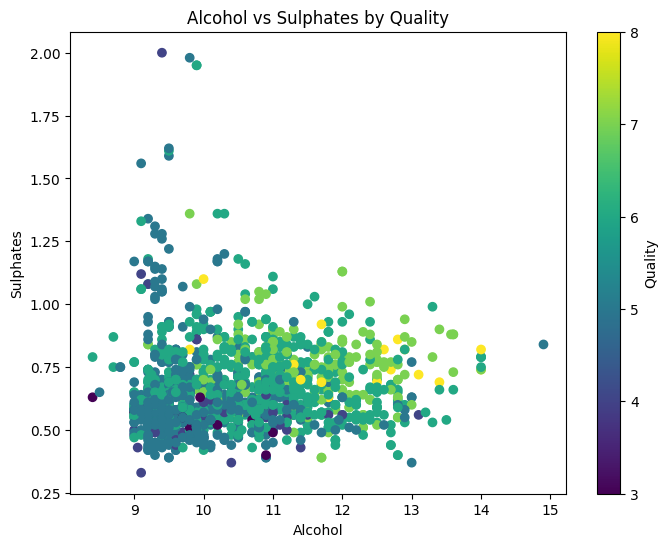

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['alcohol'], df['sulphates'], c=df['quality'], cmap='viridis')
plt.colorbar(scatter, label='Quality')  # Add colorbar to show quality levels
plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.title('Alcohol vs Sulphates by Quality')
plt.show()


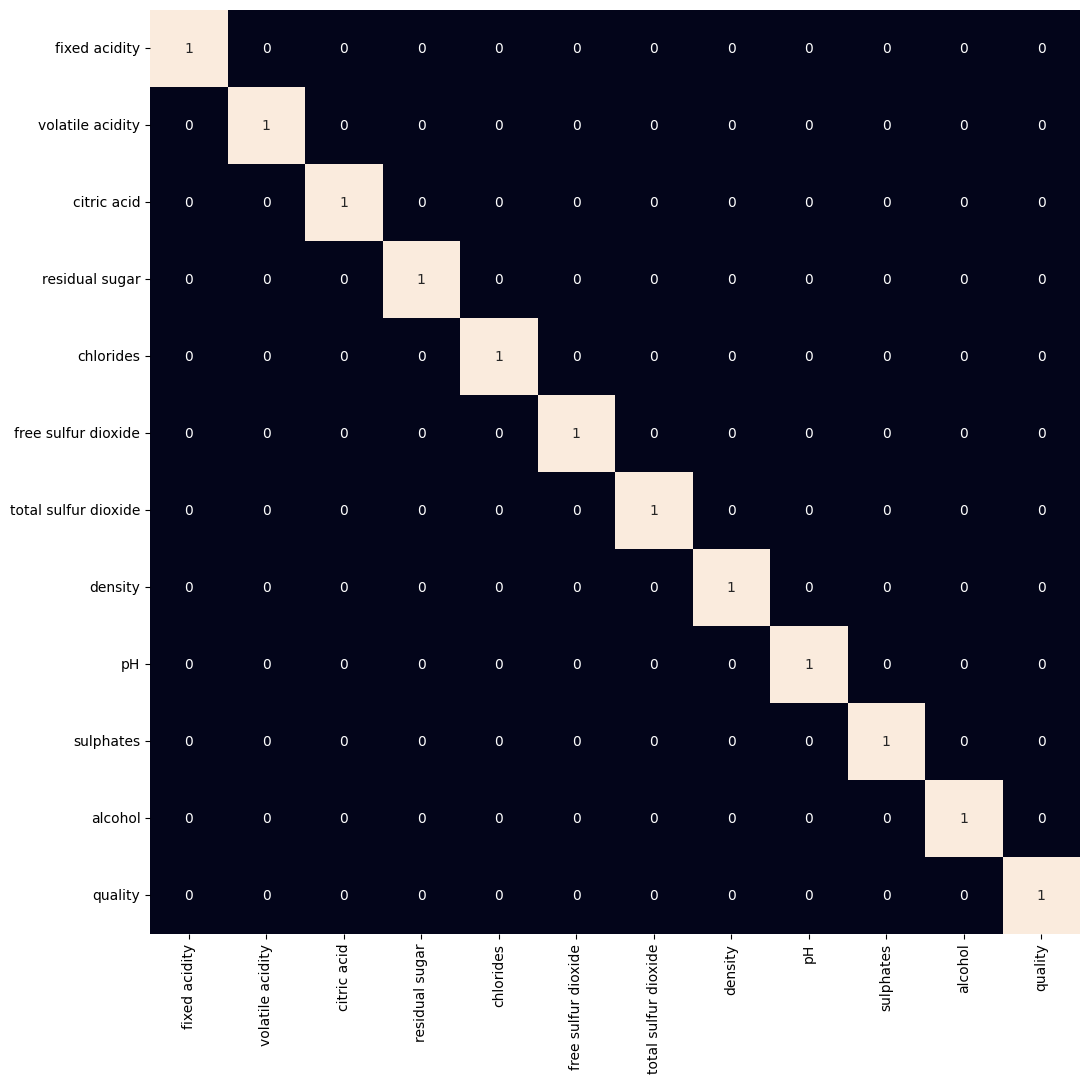

In [94]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


In [95]:
# df = df.drop('best quality', axis=1)

# Separating best quality(as 1) and worst quality(as 0) by >5

In [96]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]
df['best quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: best quality, Length: 1599, dtype: int64

# Now we will split it into 80:20 ratio for model selection.

In [97]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((1279, 11), (320, 11))

# Normalizing the data before model training

In [98]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


# We will use 3 models to see which model performs best


In [99]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()


LogisticRegression() : 
Training Accuracy :  0.7386369776546466
Validation Accuracy :  0.7745271519012229

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8495143722228776

SVC() : 
Training Accuracy :  0.7762284049769865
Validation Accu

# Plotting the training and testing loss of every model

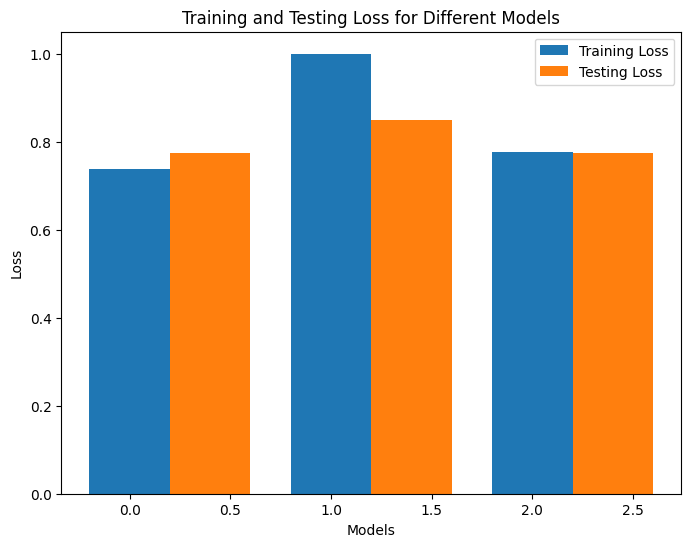

In [100]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

train_loss = []
test_loss = []

for model in models:
    model.fit(xtrain, ytrain)
    
    # Get predictions
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    train_loss.append(metrics.roc_auc_score(ytrain, train_pred))
    test_loss.append(metrics.roc_auc_score(ytest, test_pred))

# Plotting training and testing loss for each model
plt.figure(figsize=(8, 6))
plt.bar(range(len(models)), train_loss, width=0.4, label='Training Loss')
plt.bar([i + 0.4 for i in range(len(models))], test_loss, width=0.4, label='Testing Loss')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss for Different Models')

# Display the plot as the last output in the cell
plt.show()


# Let's draw confusion matrix to understand more about the results

# Confusion matrix of XGBClassifier

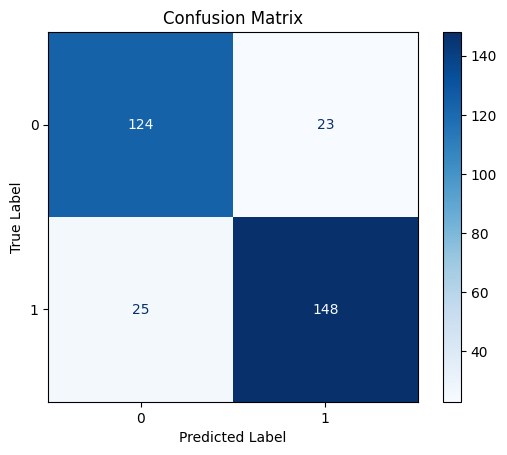

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = models[1].predict(xtest)     # models[1] is XGBClassifier, a best performing model in this case

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Display the confusion matrix without text annotations
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Let's check classification report of XGBClassifier
It will give accuracy, precision, recall and f1 score

In [102]:
print(metrics.classification_report(ytest,
									models[1].predict(xtest)))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       147
           1       0.87      0.86      0.86       173

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320

